In [1]:
import fastf1 as ff1
from fastf1 import plotting
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
# enable cache
ff1.Cache.enable_cache('cache')

# clear cache
#ff1.Cache.clear_cache('cache')

plotting.setup_mpl()

In [3]:
# select session
year = 2023
grand_prix = 'Bahrain'
session = 'R'

session = ff1.get_session(year, grand_prix, session)
session.load()

core           INFO 	Loading data for Bahrain Grand Prix - Race [v2.3.0]
api            INFO 	No cached data found for driver_info. Loading data...
api            INFO 	Fetching driver list...
api            INFO 	Data has been written to cache!
api            INFO 	No cached data found for timing_data. Loading data...
api            INFO 	Fetching timing data...
api            INFO 	Parsing timing data...
api            INFO 	Data has been written to cache!
api            INFO 	No cached data found for timing_app_data. Loading data...
api            INFO 	Fetching timing app data...
api            INFO 	Data has been written to cache!
core           INFO 	Processing timing data...
api            INFO 	No cached data found for session_status_data. Loading data...
api            INFO 	Fetching session status data...
api            INFO 	Data has been written to cache!
api            INFO 	No cached data found for track_status_data. Loading data...
api            INFO 	Fetching track sta

In [20]:
def plot_data(session, drivers, to_plot, laps=None):

    event_name = session.event.OfficialEventName

    plt.figure(figsize=(12,6))
    plt.xlabel("Lap Number")
    plt.ylabel(f"{to_plot}")
    plt.title(f"{event_name}")

    for driver in drivers:
        dr = session.laps.pick_driver(driver)
        team = dr.pick_fastest()['Team']
        if laps is None:
            plt.plot(dr['LapNumber'], dr[to_plot], color=plotting.team_color(team), label=driver)
        else:
            plt.plot(dr['LapNumber'][laps[0]:laps[1]], dr[to_plot][laps[0]:laps[1]], color=plotting.team_color(team), label=driver)

    plt.grid(True)
    plt.legend()
    plt.show()

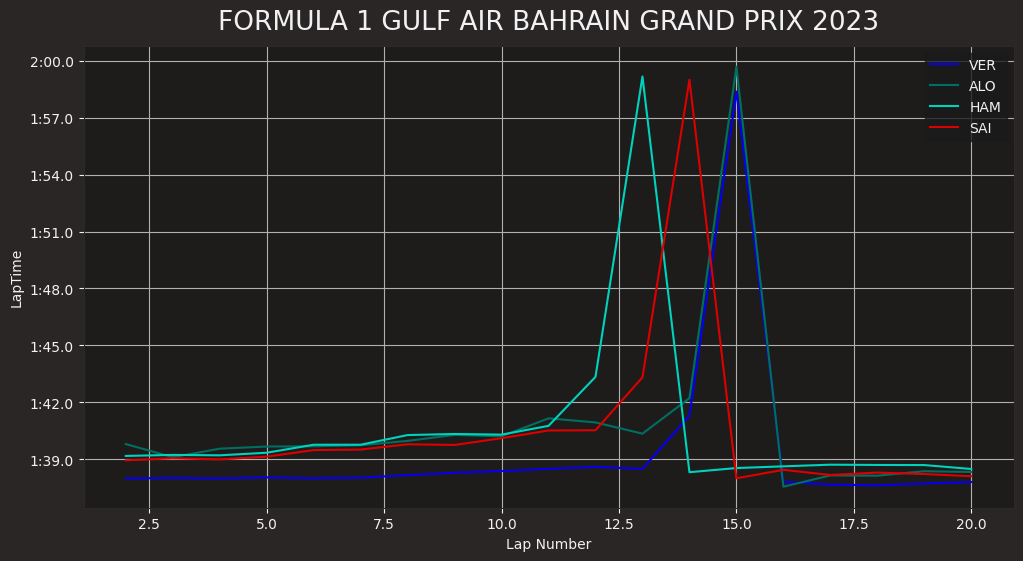

In [21]:
# select
drivers = ['VER', 'ALO', 'HAM', 'SAI']
to_plot = 'LapTime'

plot_data(session, drivers, to_plot, laps=[0,20])